# Projektinis darbas

## Reikalingos bibliotekos, paketai (angl. packets) ir kita

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize # skaidymui į sakinius, žodžius ir skyrybos ženklus
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet') # meteor įvertinimui
from nltk.corpus import stopwords # nereikšmingų žodžių sąrašas
from heapq import nlargest # reikalinga išrenkant n reikšmingiausių sakinių pagal žodžių pasikartojimą tekste

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Vizualizavimui reikalingos bibliotekos
from nltk.probability import FreqDist # žodžių pasikartojimų skaičiaus skaičiavimas
from matplotlib import pyplot as plt # diagramų pateikimas
# conda install -c conda-forge wordcloud
from wordcloud import WordCloud # žodžių debesies vizualizavimas

### Iš HD.txt failo nuskaitome tekstą, kuriam pateiksime santrauką.

In [3]:
#https://simple.wikipedia.org/wiki/Harley-Davidson
failas=open("HD.txt", 'r', encoding='utf-8')
tekstas=str(failas.read().replace('\n', ' '))
# tekstas="Harley-Davidson, or H-D for short, is an American motorcycle maker that started making motorcycles in Milwaukee in 1903. The company makes heavyweight motorcycles that are designed for cruising on the highway; they're called Harleys. Harley-Davidson is one of two big U.S. companies that made motorcycles that was still in business after the Great Depression; the other closed down in 1953.  Harleys have a special look and sound. Most new Harleys, except the V-Rods, are made to look like old Harleys. Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough. They stopped making small motorcycles in the US in 1966 and in Italy in 1978.  Harley-Davidson and their motorcycles have many fans. The fans can join clubs and go to events or to Harley-Davidson's museum. Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make. Less than one-hundredth of the money Harley-Davidson made in 2010 came from these fees."
print(tekstas)
failas.close()

Harley-Davidson, or H-D for short, is an American motorcycle maker that started making motorcycles in Milwaukee in 1903. The company makes heavyweight motorcycles that are designed for cruising on the highway; they're called Harleys. Harley-Davidson is one of two big U.S. companies that made motorcycles that was still in business after the Great Depression; the other closed down in 1953.  Harleys have a special look and sound. Most new Harleys, except the V-Rods, are made to look like old Harleys. Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough. They stopped making small motorcycles in the US in 1966 and in Italy in 1978.  Harley-Davidson and their motorcycles have many fans. The fans can join clubs and go to events or to Harley-Davidson's museum. Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make. Less than one-hundredth of the money Harley-Davidson made 

In [4]:
# Skirstome tekstą į sakinius
sentences = sent_tokenize(tekstas)

# Nustatome nereikšmingus žodžius
stop_words = stopwords.words('english')

# Nustatome skyrybos ženklus, 
# kuriuos išimsime iš žodžių vertinimo pagal dažnumą
punctuation = "!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n"

# Skirstome tekstą į žodžius
tokens = [word for word in word_tokenize(tekstas) 
          if word.lower() not in stop_words 
          and word not in punctuation]

# print(tokens)
# print()

# Žodžių dažnumo skaičiavimas
word_frequencies = {}
for word in tokens:
    word = word.lower()
    if word not in word_frequencies:
        word_frequencies[word] = 1
    else:
        word_frequencies[word] += 1

# Randamas maksimalus žodžio pasikartojimų skaičius
max_frequency = max(word_frequencies.values())


# print(max_frequency)
# print()

# Daliname kiekvieno žodžio pasikartojimų skaičių 
# iš daugiausiai pasikartojusio žodžio skaičiaus (normuojame)
for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word] / max_frequency
    
    
#     word_frequencies[word] = word_frequencies[word]

# print(word_frequencies)
# print()

# Suteikiame kiekvienam sakiniui įvertinimą pagal kiekvieno žodžio 
# tame sakinyje įvertinimą (dažnumą) t.y. sumą
sentence_scores = {}
for sent in sentences:
    for word in word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word]
            else:
                sentence_scores[sent] += word_frequencies[word]

# print(sentence_scores)
# print()

# Nustatome kiek sakinių norime išvesti (procentaliai 0.3 yra 30%)
select_length = int(len(sentences) * 0.3) # 3 sakiniai iš 11

# Išrenka didžiausią įvertinimą (atskirų žodžių dažnumo sumą) turinčius sakinius
summary_mano = nlargest(select_length, sentence_scores, key=sentence_scores.get)





# Atspausdiname vientisą santrauką
# final_summary = ' '.join([sent for sent in summary])
# print(final_summary)

# Kitas atspausdinimo būdas, kad geriau atskirtume atskirus sakinius
for sakinys in summary_mano:
    print(sakinys)

Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make.
Harley-Davidson is one of two big U.S. companies that made motorcycles that was still in business after the Great Depression; the other closed down in 1953.
Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough.


## Teksto žodžių ir skyrybos ženklų skaičius

In [5]:
# skirstome tekstą į žodžius ir skyrybos ženklus (nes norime sužinoti kiek bendrai)
words = word_tokenize(tekstas)
# teksto žodžių ir skyrybos ženklų skaičius
print(f"Tekstą sudaro tiek žodžių ir skyrybos ženklų: {len(words)}")

Tekstą sudaro tiek žodžių ir skyrybos ženklų: 187


In [6]:
# apskaičiuojamas žodžių ir skyrybos ženklų dažnumo skaičius tekste
fdist = FreqDist(words)
# atspausdinama 10 dažniausiai kartojamų žodžių ir skyrybos ženklų tekste
fdist.most_common(10)

[('in', 11),
 ('.', 11),
 ('Harley-Davidson', 8),
 ('the', 8),
 ('motorcycles', 7),
 (',', 6),
 ('and', 5),
 ('that', 4),
 ('Harleys', 4),
 ('made', 4)]

##### Žodžiai be skyrybos ženklų

In [7]:
# neatskiria `s, bet atskiria =od=ius atskirtus per - ženklą
words_no_punc = [word for word in word_tokenize(tekstas) if word not in punctuation]

print(f"Žodžių skaičius be skyrybos ženklų: {len(words_no_punc)}")
print(f"Žodžių skaičius be skyrybos ženklų ir be nereikšmingų žodžių: {len(tokens)}")

Žodžių skaičius be skyrybos ženklų: 168
Žodžių skaičius be skyrybos ženklų ir be nereikšmingų žodžių: 100


In [8]:
# # 'išima su visokiom galūnėm pvz.: 's, bet kartu išima žodžius atskirtus - pvz.: H-D
# words_no_punc1 = []

# for word in words:
#     if word.isalpha():
#         words_no_punc1.append(word.lower())

# print(f"Žodžių skaičius be skyrybos ženklų: {len(words_no_punc1)}")

# clean_words = []

# for word in words_no_punc1:
#     if word not in stop_words:
#         clean_words.append(word)

# print(f"Žodžių skaičius be skyrybos ženklų ir be nereikšmingų žodžių ir be 's galūnių ir t.t.: {len(clean_words)}")
# # print(clean_words)

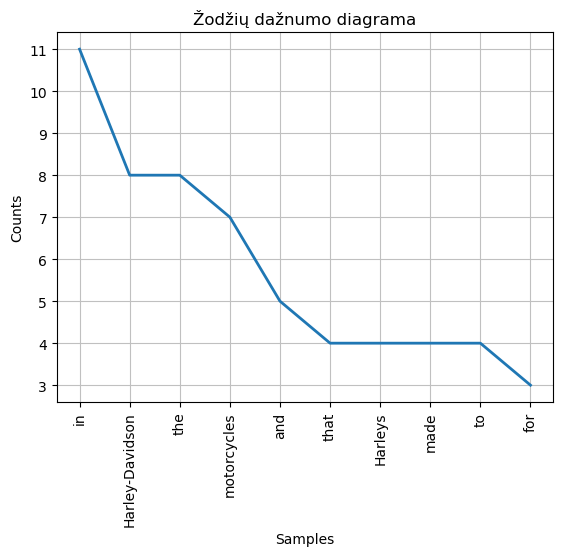

In [9]:
# randamas žodžių dažnumo tekste skaičius su nereikšmingais žodžiais
fdist = FreqDist(words_no_punc)

# vizualizuojame 10 dažniausiai pasitaikančių žodžių tekste
plt.title("Žodžių dažnumo diagrama")
plt.xlabel("Žodžiai")
plt.ylabel("Pasikartojimų skaičius")
fdist.plot(10)
plt.show()


### Nereikšmingi žodžiai 

In [10]:
#nereikšmingų žodžių sąrašas
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Vizualizavimas

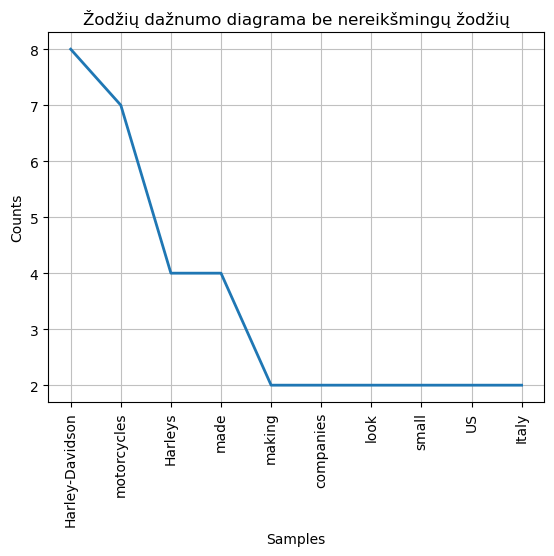

In [11]:
# randamas žodžių dažnumo tekste skaičius (be nereikšmingų žodžių)
fdist = FreqDist(tokens)
plt.title("Žodžių dažnumo diagrama be nereikšmingų žodžių")
fdist.plot(10)
plt.show()

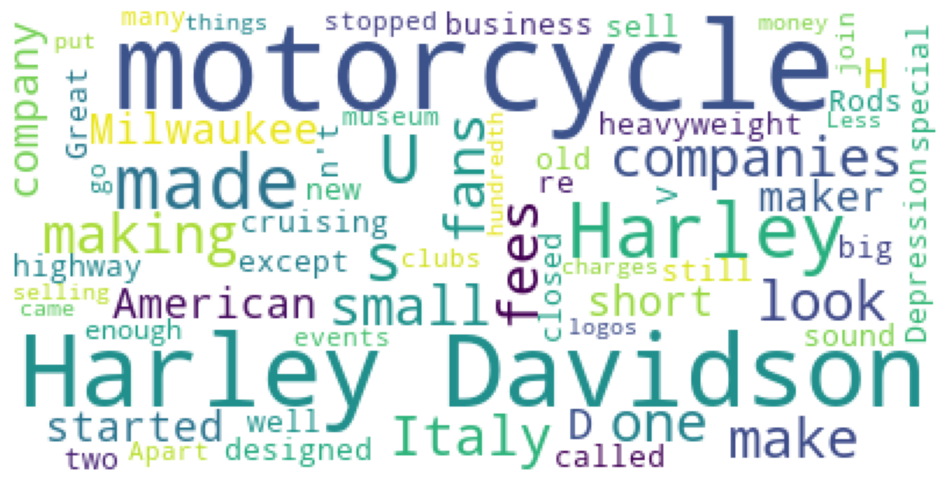

In [12]:
# sujungiame į vientisą tekstą tokens'us
clean_words_string = " ".join(tokens)
# clean_words_string = " ".join(clean_words)
# print(clean_words_string)

# sukuriamas „žodžių debesis“
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

# vaizdavimas
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# ašių įverčių rodymas yra išjungiamas
plt.axis("off")
plt.show()

## Gensim

In [13]:
# conda install -c conda-forge 'nbconvert>=7' 'mistune>=2` # versijos: be šių gensim neveikė?
# pip install gensim==3.7.0 # nei 3.8.3 veikė, nei >4. ir t.t., t.y. 3.7.0 buvo veiksimingas
from gensim.summarization import summarize

In [14]:
# Generate the summary
# compression_ratio = 0.4
# summary = summarize(tekstas, ratio=compression_ratio, split=False)
summary = summarize(tekstas, word_count = 50) #50 zodziu yra apie 3 sakinius, kad galėtume palyginti su Sumy

# Print the summary
print("Orginalus tekstas: ")
print(tekstas)
print("\nSantrauka: ")
print(summary)


Orginalus tekstas: 
Harley-Davidson, or H-D for short, is an American motorcycle maker that started making motorcycles in Milwaukee in 1903. The company makes heavyweight motorcycles that are designed for cruising on the highway; they're called Harleys. Harley-Davidson is one of two big U.S. companies that made motorcycles that was still in business after the Great Depression; the other closed down in 1953.  Harleys have a special look and sound. Most new Harleys, except the V-Rods, are made to look like old Harleys. Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough. They stopped making small motorcycles in the US in 1966 and in Italy in 1978.  Harley-Davidson and their motorcycles have many fans. The fans can join clubs and go to events or to Harley-Davidson's museum. Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make. Less than one-hundredth of the money H

## Sumy (textrank, luhn, lsa)

In [15]:
# pip install sumy
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [16]:
# teksto paruošimas
parser = PlaintextParser.from_string(tekstas,Tokenizer("english"))

In [17]:
# iš kiek sakinių norime padaryti santrauką
n_sentences = 3

### LSA

In [18]:
from sumy.summarizers.lsa import LsaSummarizer

# lsa naudojamas, žodžių debesies atspausdinimui
lsa=[]
summarizer_lsa = LsaSummarizer()
summary_1 =summarizer_lsa(parser.document,n_sentences) # n_sentences skaičius nurodo kiek sakinių bus išvedama

print("Santrauka su LSA: ")
for sentence in summary_1:
    print(sentence)
    lsa.append(str(sentence))

Santrauka su LSA: 
Harley-Davidson is one of two big U.S. companies that made motorcycles that was still in business after the Great Depression; the other closed down in 1953.
Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make.
Less than one-hundredth of the money Harley-Davidson made in 2010 came from these fees.


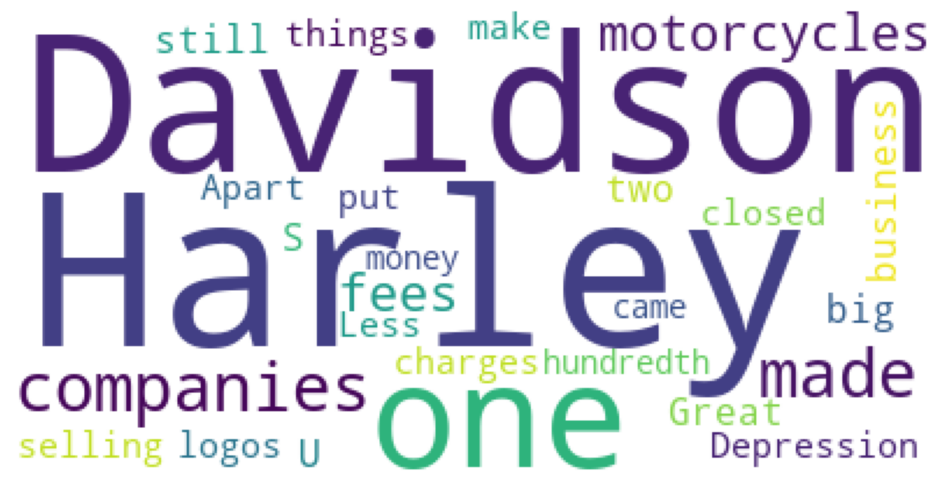

In [19]:
zodziai = " ".join(lsa)
# sukuriamas „žodžių debesis“
wordcloud = WordCloud(background_color="white").generate(zodziai)

# vaizdavimas
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# ašių įverčių rodymas yra išjungiamas
plt.axis("off")
plt.show()

In [20]:
# kitas metodas su LSA, kuris naudoja žodžių kamienus
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
summarizer_lsa2 = LsaSummarizer(Stemmer("english"))
summarizer_lsa2.stop_words = get_stop_words("english")

In [21]:
for sentence in summarizer_lsa2(parser.document,n_sentences):
    print(sentence)

The company makes heavyweight motorcycles that are designed for cruising on the highway; they're called Harleys.
Harley-Davidson is one of two big U.S. companies that made motorcycles that was still in business after the Great Depression; the other closed down in 1953.
Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough.


### LUHN

In [22]:
from sumy.summarizers.luhn import LuhnSummarizer

# luhn naudojamas, žodžių debesies atspausdinimui
luhn=[]
summarizer_luhn = LuhnSummarizer()
summary_2 = summarizer_luhn(parser.document, n_sentences) 

print("Santrauka su LUHN: ")
for sentence in summary_2:
    print(sentence)
    luhn.append(str(sentence))
# print(luhn)

Santrauka su LUHN: 
Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough.
They stopped making small motorcycles in the US in 1966 and in Italy in 1978.
Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make.


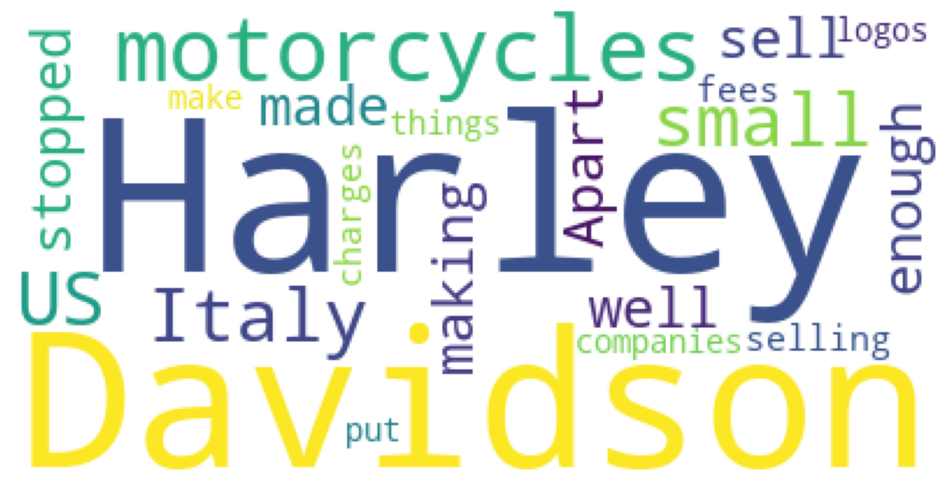

In [23]:
zodziai = " ".join(luhn)
# sukuriamas „žodžių debesis“
wordcloud = WordCloud(background_color="white").generate(zodziai)

# vaizdavimas
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# ašių įverčių rodymas yra išjungiamas
plt.axis("off")
plt.show()

### TextRank

In [24]:
from sumy.summarizers.text_rank import TextRankSummarizer

# textrank naudojamas, žodžių debesies atspausdinimui
textrank=[]
summarizer_text_rank = TextRankSummarizer()
summary_3 = summarizer_text_rank(parser.document, n_sentences) 

print("Santrauka su TextRank: ")
for sentence in summary_3:
    print(sentence)
    textrank.append(str(sentence))

Santrauka su TextRank: 
Harley-Davidson is one of two big U.S. companies that made motorcycles that was still in business after the Great Depression; the other closed down in 1953.
Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough.
They stopped making small motorcycles in the US in 1966 and in Italy in 1978.


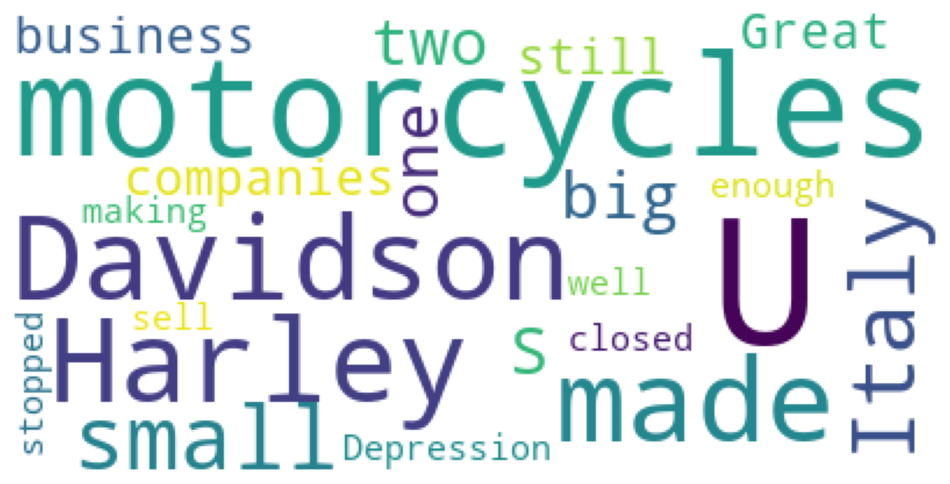

In [25]:
zodziai = " ".join(textrank)
# sukuriamas „žodžių debesis“
wordcloud = WordCloud(background_color="white").generate(zodziai)

# vaizdavimas
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# ašių įverčių rodymas yra išjungiamas
plt.axis("off")
plt.show()

# Teksto santraukos sudarymo įvertinimas ROUGE, BLEU, METEOR

## BLEU

In [26]:
# pip install nltk rouge
# from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge
from nltk.translate.meteor_score import meteor_score
from nltk.translate import meteor

In [27]:
# https://machinelearningmastery.com/calculate-bleu-score-for-text-python/
# mano nustatyta santrauka
references_text = ["Harley-Davidson, or H-D for short, is an American motorcycle maker that started making motorcycles in Milwaukee in 1903.",
                   "Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough.",
                   "Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make."]

references = [[word_tokenize(ref)] for ref in references_text]

# metodo gauti įverčiai
candidates = [word_tokenize(cand) for cand in summary_mano]
score = corpus_bleu(references, candidates)
print(f"BLEU score mano: {score}")

candidates = [word_tokenize(cand) for cand in sent_tokenize(summary)]
score = corpus_bleu(references, candidates)
print(f"BLEU score gensim: {score}")

candidates = [word_tokenize(cand) for cand in lsa]
score = corpus_bleu(references, candidates)
print(f"BLEU score lsa: {score}")

candidates = [word_tokenize(cand) for cand in luhn]
score = corpus_bleu(references, candidates)
print(f"BLEU score luhn: {score}")

candidates = [word_tokenize(cand) for cand in textrank]
score = corpus_bleu(references, candidates)
print(f"BLEU score textrank: {score}")

BLEU score mano: 1.3020095722934844e-231
BLEU score gensim: 0.3392001396598338
BLEU score lsa: 1.3215941593894153e-231
BLEU score luhn: 0.4699823608772649
BLEU score textrank: 0.33236841645116716


C:\Users\manta\anaconda3\envs\nlp_vu\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\manta\anaconda3\envs\nlp_vu\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\manta\anaconda3\envs\nlp_vu\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order

## METEOR

In [28]:
from nltk.translate import meteor_score
reference_text = "Harley-Davidson, or H-D for short, is an American motorcycle maker that started making motorcycles in Milwaukee in 1903. Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough. Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make."
reference_text = word_tokenize(reference_text)

mano_str =' '.join(summary_mano)
hypothesis = mano_str
hypothesis = word_tokenize(hypothesis)
score = meteor_score.meteor_score([reference_text], hypothesis)
print(f"METEOR score mano: {score}")

gensim_str =' '.join(sent_tokenize(summary))
hypothesis = gensim_str
hypothesis = word_tokenize(hypothesis)
score = meteor_score.meteor_score([reference_text], hypothesis)
print(f"METEOR score gensim: {score}")

lsa_str =' '.join(lsa)
hypothesis = lsa_str
hypothesis = word_tokenize(hypothesis)
score = meteor_score.meteor_score([reference_text], hypothesis)
print(f"METEOR score lsa: {score}")

luhn_str =' '.join(luhn)
hypothesis = luhn_str
hypothesis = word_tokenize(hypothesis)
score = meteor_score.meteor_score([reference_text], hypothesis)
print(f"METEOR score luhn: {score}")

textrank_str =' '.join(textrank)
hypothesis = textrank_str
hypothesis = word_tokenize(hypothesis)
score = meteor_score.meteor_score([reference_text], hypothesis)
print(f"METEOR score textrank: {score}")

METEOR score mano: 0.6621410403825625
METEOR score gensim: 0.4472052573787706
METEOR score lsa: 0.4594293576178465
METEOR score luhn: 0.7322298553798393
METEOR score textrank: 0.40145267637582094


## BLEU kitas metodas (geresnis?) 

In [29]:
from nltk.translate.bleu_score import sentence_bleu
def calculate_bleu(reference, candidate):
    # Tokenize the sentences
    reference = [word_tokenize(reference)]
    candidate = word_tokenize(candidate)

    # Calculate BLEU score
    bleu_score = sentence_bleu(reference, candidate)

    return bleu_score

# Example usage
reference_text = "Harley-Davidson, or H-D for short, is an American motorcycle maker that started making motorcycles in Milwaukee in 1903. Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough. Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make."

print("BLEU Score mano: ", calculate_bleu(reference_text, mano_str))
print("BLEU Score gensim: ", calculate_bleu(reference_text, gensim_str))
print("BLEU Score lsa: ", calculate_bleu(reference_text, lsa_str))
print("BLEU Score luhn: ", calculate_bleu(reference_text, luhn_str))
print("BLEU Score textrank: ", calculate_bleu(reference_text, textrank_str))

BLEU Score mano:  0.5964892842407203
BLEU Score gensim:  0.3391770210672424
BLEU Score lsa:  0.37705753018454813
BLEU Score luhn:  0.661616162939482
BLEU Score textrank:  0.3394102455280452


## ROUGE

In [30]:
from rouge_score import rouge_scorer
reference_text = "Harley-Davidson, or H-D for short, is an American motorcycle maker that started making motorcycles in Milwaukee in 1903. Harley-Davidson made small motorcycles in the US and in Italy, but they didn't sell well enough. Apart from selling motorcycles, Harley-Davidson also charges fees for companies to put Harley-Davidson's logos on the things they make."

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=False)



score = scorer.score(reference_text, mano_str)
print(f"Rouge score mano: {score}\n")
score = scorer.score(reference_text, gensim_str)
print(f"Rouge score gensim: {score}\n")
score = scorer.score(reference_text, lsa_str)
print(f"Rouge score lsa: {score}\n")
score = scorer.score(reference_text, luhn_str)
print(f"Rouge score luhn: {score}\n")
score = scorer.score(reference_text, textrank_str)
print(f"Rouge score textrank: {score}")

Rouge score mano: {'rouge1': Score(precision=0.6911764705882353, recall=0.7833333333333333, fmeasure=0.7343749999999999), 'rougeL': Score(precision=0.38235294117647056, recall=0.43333333333333335, fmeasure=0.40625)}

Rouge score gensim: {'rouge1': Score(precision=0.5740740740740741, recall=0.5166666666666667, fmeasure=0.543859649122807), 'rougeL': Score(precision=0.5, recall=0.45, fmeasure=0.4736842105263158)}

Rouge score lsa: {'rouge1': Score(precision=0.5151515151515151, recall=0.5666666666666667, fmeasure=0.5396825396825397), 'rougeL': Score(precision=0.4696969696969697, recall=0.5166666666666667, fmeasure=0.4920634920634921)}

Rouge score luhn: {'rouge1': Score(precision=0.8, recall=0.7333333333333333, fmeasure=0.7652173913043478), 'rougeL': Score(precision=0.7272727272727273, recall=0.6666666666666666, fmeasure=0.6956521739130435)}

Rouge score textrank: {'rouge1': Score(precision=0.5081967213114754, recall=0.5166666666666667, fmeasure=0.5123966942148761), 'rougeL': Score(precisi